In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("housing.csv",index_col=0)  
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
import statsmodels.formula.api as smf

In [17]:
m1=smf.ols('medv~crim+zn+chas+indus+age+nox+rm+dis+rad+tax+ptratio+black+lstat',df).fit()

In [18]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 03 Apr 2019   Prob (F-statistic):          6.72e-135
Time:                        12:13:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
chas           2.6867      0.862      3.118      0.002       0.994       4.380
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
age            0.0007      0.013      0.052      0.958      -0.025       0.027
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
X=df.drop(['medv'],axis=1)
Y=df[['medv']]

In [4]:
sc=StandardSfrom sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegressioncaler()
X=sc.fit_transform(X)
Y=sc.fit_transform(Y)

In [36]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [39]:
LR=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=3)
bag_knn=BaggingRegressor(base_estimator=knn,n_estimators=30,random_state=0)

# Base estimator is Decision Tree as as a regressor
bag_dt=BaggingRegressor(n_estimators=51,random_state=0)
boost_dt=AdaBoostRegressor(n_estimators=51,random_state=0)

bag_LR=BaggingRegressor(base_estimator=LR,n_estimators=50,random_state=0)
boost_LR=AdaBoostRegressor(base_estimator=LR,n_estimators = 50,random_state=0)

gboost=GradientBoostingRegressor(n_estimators=100,random_state=0)

In [40]:
type(X)

numpy.ndarray

In [8]:
type(Y)

numpy.ndarray

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [41]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=2)
for model, name in zip([LR,bag_LR,boost_LR,bag_dt,boost_dt,knn,bag_knn,gboost],
        ['LinearReg','BaggedLR','BoostedLR','BaggedDT','BoostedDT','KNN','BaggedKNN','GradientBoost']):
    rmse=[]
    for train,test in kf.split(X,Y):
        Xtrain,Xtest=X[train,:],X[test,:]
        Ytrain,Ytest=Y[train],Y[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #mse=np.sum((Ytest-Y_predict)**2)/len(Ytest)
        mse=metrics.mean_squared_error(Ytest,Y_predict)
        rmse.append(np.sqrt(mse))
    print("RMSE scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(rmse), np.var(rmse,ddof=1), name ))   
    

RMSE scores: 0.52 (+/- 0.00721) [LinearReg]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RMSE scores: 0.52 (+/- 0.00728) [BaggedLR]
RMSE scores: 0.55 (+/- 0.00511) [BoostedLR]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RMSE scores: 0.36 (+/- 0.00326) [BaggedDT]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RMSE scores: 0.39 (+/- 0.00319) [BoostedDT]
RMSE scores: 0.44 (+/- 0.00767) [KNN]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RMSE scores: 0.44 (+/- 0.00682) [BaggedKNN]
RMSE scores: 0.32 (+/- 0.00153) [GradientBoost]


In [34]:
(0.0065-.00511)/.0065

0.21384615384615382

In [117]:
models = []
models.append(('Simple_Linear_Regression',LR))
models.append(('AdaBoost_Reg_using_DT',abreg_dt))
models.append(('AdaBoost_Reg_using_LR',abreg_LR))
models.append(('GradientBoost_Reg',gbreg))


Simple_Linear_Regression: -1.584199 (9.180153)
AdaBoost_Reg_using_DT: 0.505715 (0.082197)
AdaBoost_Reg_using_LR: -2.047845 (12.239849)
GradientBoost_Reg: 0.577598 (0.049991)


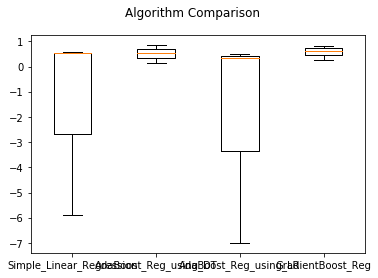

In [122]:
from sklearn.model_selection import KFold,cross_val_score
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=3,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), np.var(cv_results))
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [123]:
cv_results

array([0.81781693, 0.63555614, 0.27941997])

In [78]:
Xnew=X[:500,:]

In [80]:
Ynew=Y[:500]

In [77]:
Xnew.shape

(500, 13)

In [63]:
Ynew.shape

(500, 1)

In [81]:
Xprod=X[501:,:]

In [82]:
Yprod=Y[501:]

In [83]:
#fitting the best model before delivery
gbreg.fit(Xnew,Ynew)

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=2, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
housing_value_predicted=gbreg.predict(Xprod)
housing_value_predicted

array([ 0.20318981,  0.02696698,  0.82286285,  0.48693929, -0.00583182])

In [87]:
housing_value_predicted_in_real_units=sc.inverse_transform(housing_value_predicted)
housing_value_predicted_in_real_units

array([24.3997166 , 22.78057925, 30.09327973, 27.00681014, 22.47922346])

In [89]:
Yprod_in_real_units=sc.inverse_transform(Yprod)
Yprod_in_real_units

array([[22.4],
       [20.6],
       [23.9],
       [22. ],
       [11.9]])

In [96]:
np.sum((housing_value_predicted-Yprod)**2)/5

3.157826187467221